<a href="https://colab.research.google.com/github/trungle1101/csc322/blob/master/Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt
from random import random

## Task 1


In [3]:
def generate_data(a, variance):
  epsilon = np.random.normal(0, math.sqrt(variance), size = 5000)
  x = np.zeros(5000)
  x0=0
  x[0] =  a * x0 + epsilon[0]

  for i in range(1, 5000):
    x[i] = a * x[i-1] + epsilon[i]

  return x.reshape(len(x),1)
  
def train(learningRate, a, variance, epoch=100):
  mse_score = []
  x0 = 0
  for iter in range(epoch):
    x = generate_data(a, variance)
    w = 0
    err_arr = []
    # First element
    x_pred1 = x0 * w
    error1  = x[0] - x_pred1
    w = w + learningRate * error1 * x[0]
    err_arr.append(error1)

    for n in range(1, len(x)):
      x_pred = x[n-1] * w      
      error  = x[n] - x_pred
      w = w + learningRate * error * x[n-1]
      err_arr.append(error)
      
    mse_score.append(err_arr)
  mse_score = np.array(mse_score).reshape(epoch, 5000)
    
  return w, mse_score

def plot(mse, J, learningRate):
  plt.title('Learning-rate parameter =' + str(learningRate))
  plt.semilogy(np.mean(np.square(mse), axis=0), 'k-', label='Experiment', linewidth=0.6)
  plt.semilogy(J, 'b--', label='Theory', linewidth=0.6)
  plt.xlabel("Number of iterations")
  plt.ylabel("MSE")
  plt.show()

def linear_prediction(learning_rate, a = 0.99, variance = 0.02, sig2 = 0.995):
  t = np.asarray(range(1, 5000))
  w, mse = train(learning_rate, a, variance, epoch=100)
    
  eta = learning_rate 
  J = sig2*(1-a**2)*(1+(eta/2)*sig2) + sig2*(a**2+(eta/2)*(a**2)*sig2-0.5*eta*sig2)*(1-eta*sig2)**(2*t)

  plot(mse, J, eta)

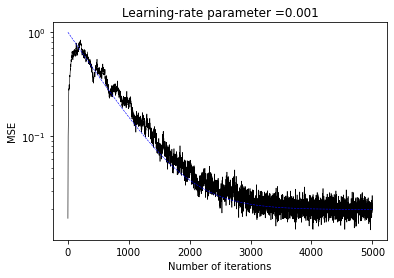

In [4]:
linear_prediction(learning_rate = 0.001)

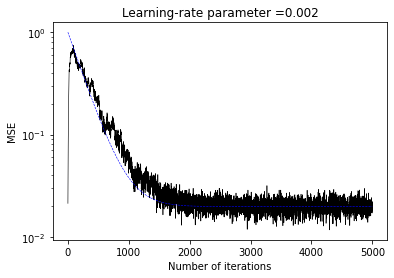

In [5]:
linear_prediction(learning_rate = 0.002)

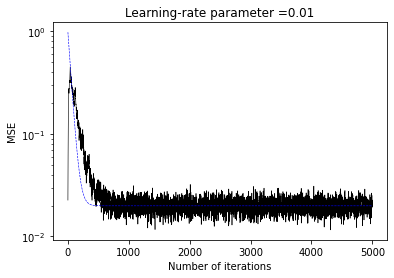

In [6]:
linear_prediction(learning_rate = 0.01)

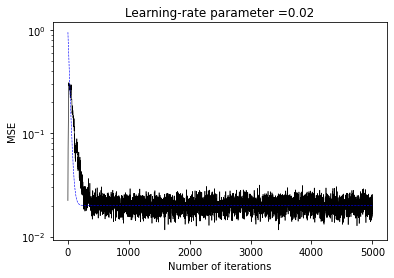

In [7]:
linear_prediction(learning_rate = 0.02)

## Task 2


In [8]:
def moon(num_points,distance,radius,width):

 points = num_points

 x1 = [0 for _ in range(points)]
 y1 = [0 for _ in range(points)]
 x2 = [0 for _ in range(points)]
 y2 = [0 for _ in range(points)]

 for i in range(points):
    d = distance
    r = radius
    w = width
    a = random()*math.pi
    x1[i] = math.sqrt(random()) * math.cos(a)*(w/2) + ((-(r+w/2) if(random() < 0.5) else (r+w/2)) * math.cos(a))
    y1[i] = math.sqrt(random()) * math.sin(a)*(w) + (r * math.sin(a)) + d
  
    a = random()*math.pi + math.pi
    x2[i] = (r+w/2) + math.sqrt(random()) * math.cos(a)*(w/2) + ((-(r+w/2)) if(random() < 0.5) else (r+w/2)) * math.cos(a)
    y2[i] = -(math.sqrt(random()) * math.sin(a)*(-w) + (-r * math.sin(a))) - d
 return ([x1,x2,y1,y2])

In [9]:
def Concatenate(X1,X2,Y1,Y2):
  #Convert list to numpy array and reshape
  X1 = np.asarray(X1)
  Y1 = np.asarray(Y1)
  X1 = X1.reshape(X1.shape[0],1)
  Y1 = Y1.reshape(Y1.shape[0],1)

  #Combine X and Y into one matrix X
  inputs_1 = np.concatenate((X1,Y1),axis = 1)
  #Now input has 2 features, adding feature with value 1 for bias
  X0 = np.ones((inputs_1.shape[0],1))
  inputs_1 = np.concatenate((X0,inputs_1),axis = 1)
  #Label for the first 1000 samples as 1
  label_1 = np.ones((inputs_1.shape[0],1))

  #Do the same with sample in region B
  X2 = np.asarray(X2)
  Y2 = np.asarray(Y2)
  X2 = X2.reshape(X2.shape[0],1)
  Y2 = Y2.reshape(Y2.shape[0],1)

  #Concatenate X and Y into one matrix X
  inputs_2 = np.concatenate((X2,Y2),axis = 1)
  #Adding feature with value 1 for bias
  inputs_2 = np.concatenate((X0,inputs_2),axis = 1)

  #Label for the sencond 1000 samples as -1
  label_2 = np.zeros((inputs_2.shape[0],1))


  #Concatenate all together
  inputs = np.concatenate((inputs_1,inputs_2), axis=0)
  label = np.concatenate((label_1,label_2), axis=0)
  return inputs, label

In [58]:
class LMS:
  def __init__(self):
    self.w = None
    self.mse = None
    self.error = None
    return

  def fit(self, X, y, epochs, learningRate, earlyStop=False):
    m = y.shape[0]
    w = np.zeros(X[0].shape)
    mse_arr = []
    

    #data shuffle
    np.random.seed(3)
    np.random.shuffle(X)
    np.random.seed(3)
    np.random.shuffle(y)

    for i in range(epochs):
      totalError = 0.00
      errorMSE = 0
      for i in range(m):
        error = y[i] - self.predict(X[i], w)
        w = w + learningRate * error * X[i]
        errorMSE += error**2
        if error != 0:
          totalError += 1
      self.error = totalError
      mse_arr.append(errorMSE/m)
      if totalError <= 0.0 and earlyStop: # early stop
        break
    self.w = w
    self.mse = mse_arr
    self.plot(X,y)

  def signum(self, X, w):
    sum = np.dot(X,w)
    filter = np.vectorize(lambda t: 1.0 if t>=0 else 0.0)
    return filter(sum)

  def predict(self, X, w):
    return self.signum(X,w)

    # for i in range(len(x)):
    #     sum = sum + w[i+1]*x[i]
    # if sum >=0: return 1.0
    # else: return 0.0

  def plot(self, X, y):
    # getting the x co-ordinates of the decision boundary
    plot_x = np.array([min(X[:,1])-2, max(X[:,1])+2])
    # getting corresponding y co-ordinates of the decision boundary
    plot_y = (-1/self.w[2]) * (self.w[1] * plot_x + self.w[0])
    # Plot decision boundary
    plt.plot(plot_x, plot_y, label = "Decision_Boundary")

    # Plot scatter points of double moon
    for i in range(X.shape[0]):
      if y[i]==0:
        plt.scatter(X[i][1], X[i][2], marker='.', color='r')
      else:
        plt.scatter(X[i][1], X[i][2], marker='.', color='b')
    plt.axis([-20, 30, -20, 20])
    plt.xlabel('First input')
    plt.ylabel('Second input')
    
    plt.show()

### d = 1

LMS with d = 1


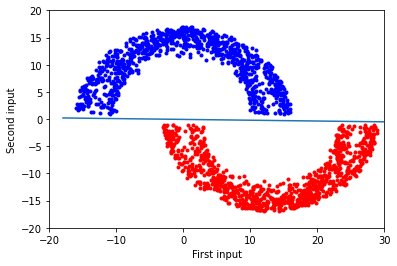

Accuracy = 100.00%


In [48]:
d = 1
print('LMS with d = 1')
X_train1, Y_train1 = Concatenate(*moon(1000,d,10,6))
model1 = LMS()
model1.fit(X_train1, Y_train1, epochs = 50, learningRate=0.01)
print('Accuracy = {:.2f}%'.format(100-float(model1.error/len(Y_train1)*100)))

### d = 0

LMS with d = 0


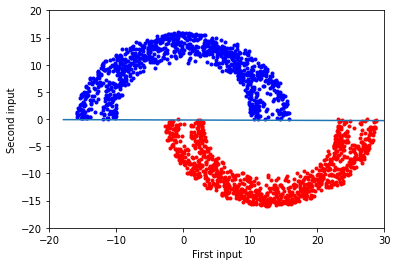

Accuracy = 99.4000%


In [14]:
d = 0
print('LMS with d = 0')
X_train2, Y_train2 = Concatenate(*moon(1000,d,10,6))
model2 = LMS()
model2.fit(X_train2, Y_train2, epochs = 50, learningRate=0.01)
print('Accuracy = {:.2f}%'.format(100-float(model2.error/len(Y_train2)*100)))

### d = -4

LMS with d = -4


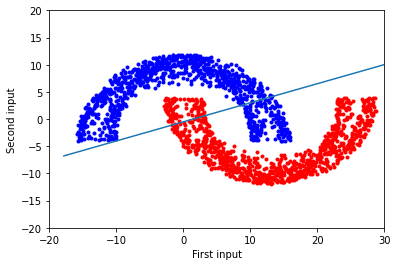

Accuracy = 80.55%


In [59]:
d = -4
print('LMS with d = -4')
X_train3, Y_train3 = Concatenate(*moon(1000,d,10,6))
model3 = LMS()
model3.fit(X_train3, Y_train3, epochs = 50, learningRate=0.005)
print('Accuracy = {:.2f}%'.format(100-float(model3.error/len(Y_train3)*100)))

In [57]:
print(model3.error)

2000.0


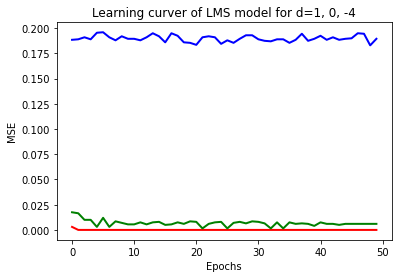

In [51]:
iters = [i for i in range(50)]
plt.plot(iters, model1.mse, color='r', linewidth=2, label="d = 1")
plt.plot(iters, model2.mse, color='g', linewidth=2,  label="d = 0")
plt.plot(iters, model3.mse, color='b', linewidth=2, label="d = -4")
plt.title('Learning curver of LMS model for d=1, 0, -4')
plt.ylabel('MSE')
plt.xlabel('Epochs')
plt.show()